# Fake News Detector

### Problem statement
In today's world articles, posts, news can be generated and spread easily. Analyzing the articles, detecting misinformation and stopping from spreading is crucial to maintaing the safety in society. Fake information can spread false information, leading people to make incorrect decisions based in inaccruate data. Fake information can impact the election results, economic, social, health and safety of people.


Dataset: https://www.kaggle.com/datasets/jainpooja/fake-news-detection

### Overview
This application generates different models to identify the fake news and evaluate the performance of those models. As part of this project, we are considering following methods to create the models:

- Passive Aggressive Classifier
- Gradient Boost Classifier
- Support Vector
- Extreme Gradient Boost Classifier

I also used same methods on news text and tokenized/lemmanized text to evaluate the performance of the different models.



## Install Packages

In [2]:
#One Time Execution
import nltk
nltk.download('all')

!pip install wordcloud
!pip install xgboost
!export PATH=/Library/TeX/texbin:$PATH

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/konicapatait/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/konicapatait/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/konicapatait/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/konicapatait/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/konicapatait/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
from xgboost import XGBClassifier


from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

from wordcloud import WordCloud 

import time
import re

## Read the data

In [3]:
fake_news = pd.read_csv("./data/Fake.csv")
true_news = pd.read_csv("./data/True.csv")
print(f"Fake dataset have the shape: {fake_news.shape} and True dataset have the shape: {true_news.shape}")
fake_news.head()

Fake dataset have the shape: (23481, 4) and True dataset have the shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Merge and Shuffle the dataset

In [5]:
fake_news['isFake'] = 1
true_news['isFake'] = 0

df_merge = pd.concat([fake_news, true_news], axis =0 )

df_merge = df_merge.sample(frac=1)
df_merge.head(5)

,title,text,subject,date,isFake
12282,Iraqi Shi'ite paramilitary chief seeks to put ...,BAGHDAD (Reuters) - The commander of Iraq s bi...,worldnews,"December 14, 2017",0
562,Protesters Welcome Trump Home To His Golden T...,Donald Trump has not been having a good weeken...,News,"August 15, 2017",1
15010,"At least one person dead, 50 wounded in Iraq a...","ERBIL, Iraq (Reuters) - At least one person di...",worldnews,"November 12, 2017",0
12636,Palestinians to snub Pence during visit over J...,CAIRO/GAZA (Reuters) - Palestinian President M...,worldnews,"December 9, 2017",0
6937,"Ben Stein Hilariously Bashes Trump, Tells Him...","Ben Stein is on a Trump-bashing spree again, a...",News,"April 12, 2016",1


## Data Exploration

In [6]:

df_nullvalues = df_merge[(df_merge.title.isnull()==True) | (df_merge.text.isnull()==True)| (df_merge.subject.isnull()==True) | (df_merge.date.isnull()==True)] 
df_nullvalues

,title,text,subject,date,isFake


### Tokenized Text

In [6]:


start_time = time.time()
stemmer = PorterStemmer()

alltokeninzed_words = []
for text in df_merge.text:
    tokenized_words = word_tokenize(str(text))
    stemmed_words = []                               
    for tokenized_word in tokenized_words:
        stemmed_word = stemmer.stem(tokenized_word)
        stemmed_words.append(stemmed_word)                           
    alltokeninzed_words.append(stemmed_words)

df_merge['words'] = alltokeninzed_words

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" ) 
print(df_merge.head())

Elapsed time: 4.593972635269165 minutes
                                                   title  \
5483   Trump evaluating national security adviser Fly...   
672    Vietnam, China avoid quarrel over South China ...   
73     White House aide sees temporary funding fix fo...   
2572   Russian banker who met Trump son-in-law not ac...   
16090  Cameroon court sentences opposition leader to ...   

                                                    text       subject  \
5483   WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
672    (Reuters) - China and Vietnam avoided conflict...  politicsNews   
73     WASHINGTON (Reuters) - A short-term fix to fun...  politicsNews   
2572   MOSCOW (Reuters) - A senior Russian banker who...  politicsNews   
16090  DOUALA, Cameroon (Reuters) - A military court ...     worldnews   

                     date  isFake  \
5483   February 13, 2017        0   
672    November 12, 2017        0   
73     December 20, 2017        0   
2572  

### Word Cloud

Fake News:
 title       70% Of Republican High Rollers Want Trump Out...
text       Donald Trump has been an absolute nightmare fo...
subject                                                 News
date                                          August 6, 2016
isFake                                                     1
words      [donald, trump, ha, been, an, absolut, nightma...
Name: 5160, dtype: object


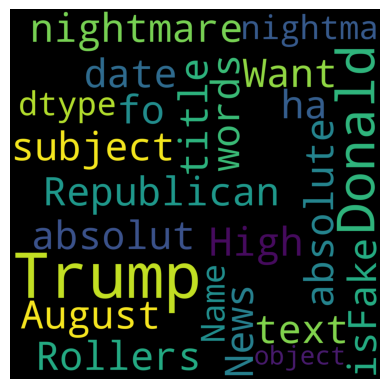

In [7]:
# Fake news


fake_news = df_merge.loc[(df_merge['isFake'] == 1)].iloc[0]

print(f'Fake News:\n {fake_news}')
wordCloud = WordCloud(background_color="black", max_words=3000, max_font_size=256,
               random_state=13, width=1500, height=1500, prefer_horizontal=0.5)
wordCloud.generate(str(fake_news))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

Genuine News: title      Trump evaluating national security adviser Fly...
text       WASHINGTON (Reuters) - President Donald Trump ...
subject                                         politicsNews
date                                      February 13, 2017 
isFake                                                     0
words      [washington, (, reuter, ), -, presid, donald, ...
Name: 5483, dtype: object


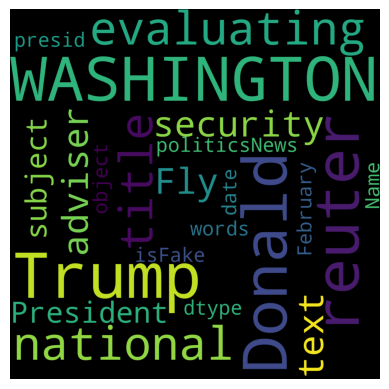

In [8]:
# Genuine News

genuine_news = df_merge.loc[(df_merge['isFake'] == 0)].iloc[0]
print(f'Genuine News: {genuine_news}')
wordCloud = WordCloud(background_color="black", max_words=3000, max_font_size=256,
               random_state=13, width=1500, height=1500, prefer_horizontal=0.5)
wordCloud.generate(str(genuine_news))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Dataset Splitting

In [9]:
x = df_merge['text']
y = df_merge['isFake']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(x.shape, y.shape)
print(x_train.head())
print(y_train.head())

(44898,) (44898,)
22744    21st Century wire says The FBI recently releas...
7369     Republican presidential frontrunner Donald Tru...
1818     WASHINGTON (Reuters) - The U.S. government on ...
16481    Philip Haney is a lone Patriot in the war on e...
13533    When Black Lives Matter supporters use the sam...
Name: text, dtype: object
22744    1
7369     1
1818     0
16481    1
13533    1
Name: isFake, dtype: int64


In [10]:

xw = df_merge['words']
yw = df_merge['isFake']

xw_string = xw.apply(lambda x: ' '.join(x))
xw_train, xw_test, yw_train, yw_test = train_test_split(xw_string, yw, test_size=0.25)
print(xw.shape, yw.shape)
print(xw_train.head())
print(yw_train.head())

(44898,) (44898,)
15255    geneva ( reuter ) - the 400,000 civilian besie...
16171    juba , south sudan/kitchanga , democrat republ...
13204    dubai ( reuter ) - offici in ali abdullah sale...
19033    berlin/pari ( reuter ) - german chancellor ang...
1242     if you are look for somewher to drink while yo...
Name: words, dtype: object
15255    0
16171    0
13204    0
19033    0
1242     1
Name: isFake, dtype: int64


## Model Selection

### 1. Passive Aggresive Classifier

In [10]:
vectorizer = TfidfVectorizer()

# transforming
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [12]:
vectorizerW = TfidfVectorizer()
# max_features=5000
# transforming words
tfidfw_train = vectorizerW.fit_transform(xw_train)
tfidfw_test = vectorizerW.transform(xw_test)

In [13]:
start_time = time.time()
pac = PassiveAggressiveClassifier(random_state = 42,loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')


end_time = time.time()
elapsed_time = (end_time - start_time)
print(f"Elapsed time: {elapsed_time} seconds" )



Accuracy: 99.49%
Elapsed time: 0.3801898956298828 seconds


In [14]:
start_time = time.time()

pac = PassiveAggressiveClassifier(random_state = 7,loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidfw_train, yw_train.values.ravel())

#Predict on the test set and calculate accuracy
yw_pred = pac.predict(tfidfw_test)
scoreForWords = accuracy_score(yw_test, yw_pred)

print(f'Accuracy: {round(scoreForWords*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)
print(f"Elapsed time: {elapsed_time} seconds" )

Accuracy: 99.62%
Elapsed time: 0.3675520420074463 seconds


### 2. Gradient Boost Clasifier

In [15]:
start_time = time.time()

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(tfidf_train, y_train)
pred_gbc = gbc.predict(tfidf_test)
scoreForgbc = accuracy_score(y_test, pred_gbc)

print(f'Accuracy: {round(scoreForgbc*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )

#gbc.score(tfidf_test, y_test)

#print(classification_report(y_test, pred_gbc))

Accuracy: 99.62%
Elapsed time: 4.1143294215202335 minutes


In [16]:
start_time = time.time()

gbcw = GradientBoostingClassifier(random_state=0)
gbcw.fit(tfidfw_train, yw_train)
pred_gbcw = gbcw.predict(tfidfw_test)
scoreForgbcw = accuracy_score(yw_test, pred_gbcw)

print(f'Accuracy: {round(scoreForgbcw*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )

Accuracy: 99.75%
Elapsed time: 37.65594458580017 minutes


### 3. Support Vector Machine

In [17]:
start_time = time.time()

svc = svm.SVC()
svc.fit(tfidf_train, y_train)

pred_svc = svc.predict(tfidf_test)
scoreFromSVC = accuracy_score(y_test, pred_svc)
print(f'Accuracy: {round(scoreFromSVC*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )

Accuracy: 99.28%
Elapsed time: 169.17534261544546 minutes


In [18]:
start_time = time.time()

svcw = svm.SVC()
svcw.fit(tfidfw_train, yw_train)

pred_svcw = svcw.predict(tfidfw_test)
scoreFromSVCW = accuracy_score(yw_test, pred_svcw)
print(f'Accuracy: {round(scoreFromSVCW*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )

Accuracy: 99.41%
Elapsed time: 543.7800947666168 minutes


### 4. eXtreme Gradient Boosting (XGBoost)

In [19]:
print(f'Tuning XGBoost')

Tuning XGBoost


In [ ]:
start_time = time.time()

#param_test = {
# 'max_depth':range(3,10,2),
# 'n_estimators':range(100,1000,50)
#}

param_test = {
 'max_depth':range(5,10,2),
 'n_estimators':range(400,800,100)
}

gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',  scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5) 
#nthread=4
gsearch.fit(tfidf_train ,y_train)
print(gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_)
gs_time = time.time()
elapsed_time = (gs_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )


xgbc = XGBClassifier(max_depth=6, n_estimators=1000, learning_rate=0.3)
xgbc.fit(tfidf_train, y_train)
pred_xgbc = xgbc.predict(tfidf_test)
scoreFromXGBC = accuracy_score(y_test, pred_xgbc)
print(f'Accuracy: {round(scoreFromXGBC*100, 2)}%')

end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time} minutes" )

#pred_xgbc.score(tfidf_test, y_test)

#Accuracy: 49.91%
#Elapsed time: 2.6986980994542438 minutes

## Conclusion

Based on all the methods, Passive aggressive classifier shows the best result based on the accuracy, followed by gradient boost and Support vector machine. Although the difference in accuracy is not much but time taken to train the model have huge difference.

Passive Aggressive classifier took few seconds to train the model, Gradient boost took in minutes whereas Support Vector took hours.

It can be noticed that if the text is tokenized and stemmed, the accuracy of the model improves. This is applicable for all the models as it reduce the unwanted text.